In [61]:
import pandas as pd
import numpy as np
from icecream import ic
import seaborn as sns

In [62]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


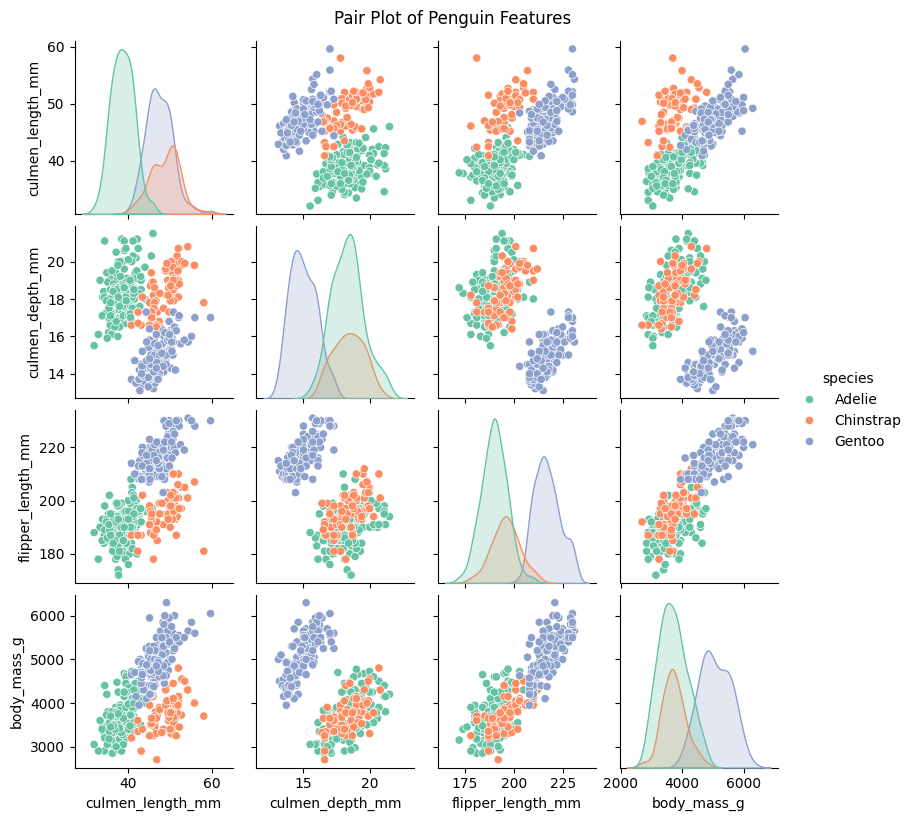

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']

df_clean = df[columns].dropna()

sns.pairplot(df_clean, hue='species', palette='Set2', diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Penguin Features', y=1.02)
plt.show()


Train Accuracy: 	0.94531
Train Macro Avg F1: 	0.93380


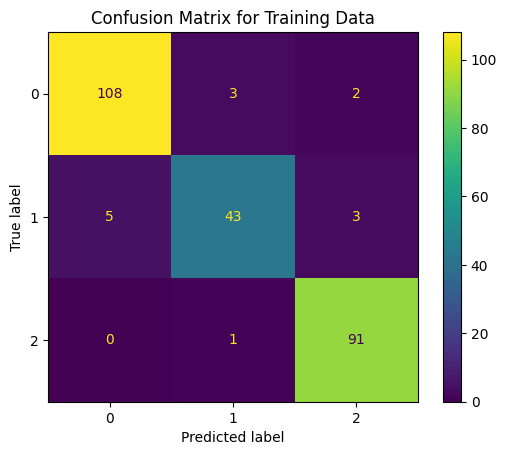

Test Accuracy: 		0.98837
Test Macro Avg F1: 	0.98557


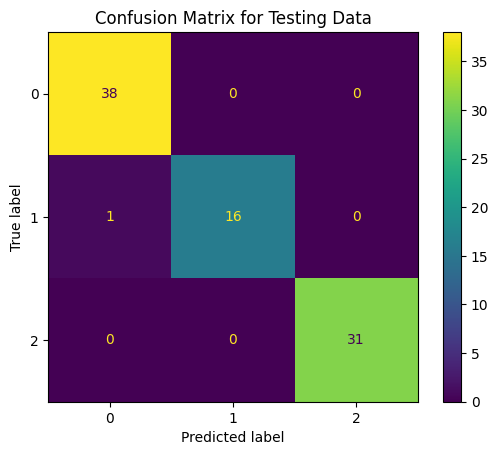

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df_clean[['culmen_length_mm', 'flipper_length_mm']]
y = df_clean['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f'Train Accuracy: \t{train_accuracy:.5f}')
print(f'Train Macro Avg F1: \t{train_f1:.5f}')
cm_train = ConfusionMatrixDisplay(confusion_matrix = train_confusion)
cm_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()


print(f'Test Accuracy: \t\t{test_accuracy:.5f}')
print(f'Test Macro Avg F1: \t{test_f1:.5f}')
cm_test = ConfusionMatrixDisplay(confusion_matrix = test_confusion)
cm_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

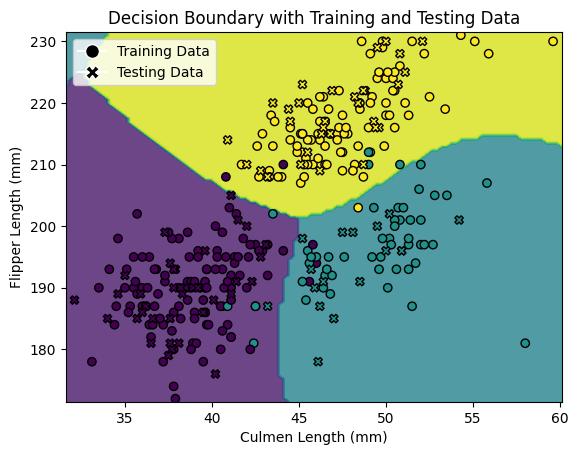

In [65]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

display = DecisionBoundaryDisplay.from_estimator(model, X, alpha=0.8, eps=0.5)
plt.scatter(X_train['culmen_length_mm'], X_train['flipper_length_mm'], c=y_train_encoded, edgecolors="k", marker='o', label='Training Data')
plt.scatter(X_test['culmen_length_mm'], X_test['flipper_length_mm'], c=y_test_encoded, edgecolors="k", marker='X', label='Testing Data')
plt.title('Decision Boundary with Training and Testing Data')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Training Data'),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='k', markersize=10, label='Testing Data')
]
plt.legend(handles=legend_elements)

plt.show()

Train Accuracy: 	0.94922
Train Macro Avg F1: 	0.93930


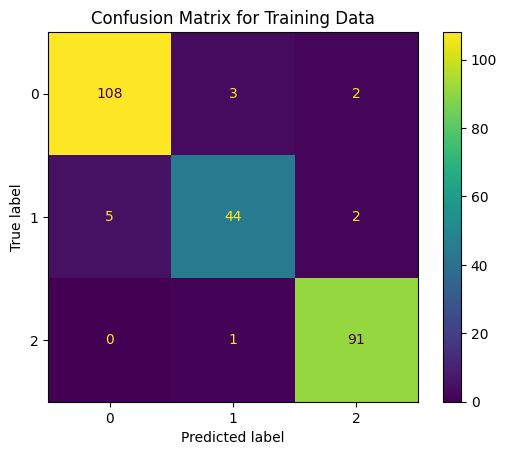

Test Accuracy: 		1.00000
Test Macro Avg F1: 	1.00000


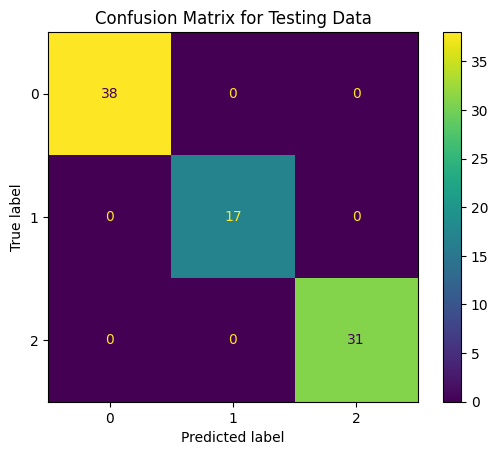

In [66]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'svc__C': [0.01, 0.1, 1, 10, 100], 
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__degree': [2, 3, 4, 5],
    'svc__decision_function_shape': ['ovr', 'ovo']
}

random_search = RandomizedSearchCV(model, parameters, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f'Train Accuracy: \t{train_accuracy:.5f}')
print(f'Train Macro Avg F1: \t{train_f1:.5f}')
cm_train = ConfusionMatrixDisplay(confusion_matrix = train_confusion)
cm_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()


print(f'Test Accuracy: \t\t{test_accuracy:.5f}')
print(f'Test Macro Avg F1: \t{test_f1:.5f}')
cm_test = ConfusionMatrixDisplay(confusion_matrix = test_confusion)
cm_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

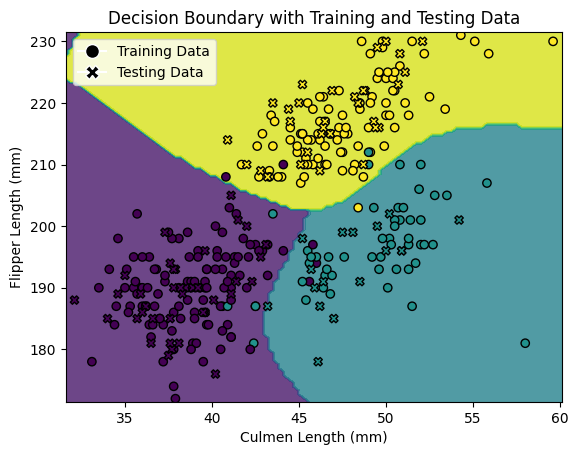

In [67]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

display = DecisionBoundaryDisplay.from_estimator(best_model, X, alpha=0.8, eps=0.5)
plt.scatter(X_train['culmen_length_mm'], X_train['flipper_length_mm'], c=y_train_encoded, edgecolors="k", marker='o', label='Training Data')
plt.scatter(X_test['culmen_length_mm'], X_test['flipper_length_mm'], c=y_test_encoded, edgecolors="k", marker='X', label='Testing Data')
plt.title('Decision Boundary with Training and Testing Data')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Training Data'),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='k', markersize=10, label='Testing Data')
]
plt.legend(handles=legend_elements)

plt.show()